In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math 
from tqdm.notebook import tqdm

In [2]:
img_dir = './flower.png'

image = Image.open(img_dir)

(256, 256, 3)


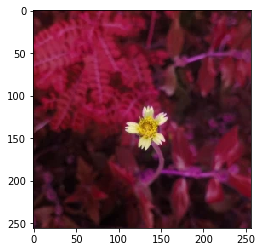

In [3]:
np_img = np.array(image.getdata()).reshape(image.size[1], image.size[0], 3)
print(np_img.shape)

## Display image 
plt.imshow(np_img)
plt.show()

In [14]:
def crop_center(img,cropx,cropy):
    y , x, _ = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx, :]

In [15]:
np_img = crop_center(np_img,100,100)

In [16]:
np_img.shape

(100, 100, 3)

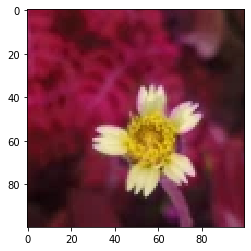

In [18]:
## Display image 
plt.imshow(np_img)
plt.show()

In [19]:
saliency_matrix = np.zeros_like(np_img)
for curr_row in tqdm(range(np_img.shape[0])):
    for curr_col in range(np_img.shape[1]):
        curr_pixel = np_img[curr_row, curr_col]
        
        saliency_val = 0
        for row in range(np_img.shape[0]):
            for col in range(np_img.shape[1]):
                
                dist = np.linalg.norm(curr_pixel-np_img[row, col])
#                 print(dist)
                pos = math.exp(abs(curr_row - row)+ abs(curr_col - col))
#                 print(pos)
                saliency_val += (dist*pos)
        
        saliency_matrix[curr_row, curr_col] = saliency_val

In [21]:
saliency_matrix = saliency_matrix / np.max(saliency_matrix)

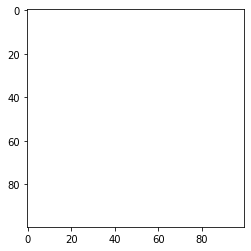

In [23]:
## Visualize the image mask
# plt.imshow(np_img)
plt.imshow(saliency_matrix, cmap='gray')
plt.show()

In [24]:
np.max(saliency_matrix)

1.0

In [25]:
saliency_matrix

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])